In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK/NFRP_upper_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.374,0.0582,[2],0,0.330,70,0.0929,...,-1,0,0,(),Normal,Unk,Unk,1,Target,179616078
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.0340,[2],0,0.334,24,0.0670,...,-1,0,0,(),Normal,Unk,Unk,1,Target,238770310
2,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,SDLHEVK/2,0.133,0.0000,[2],0,0.497,15,0.0470,...,-1,0,0,(),Normal,Unk,Unk,1,Target,241538140
3,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.479,0.2490,[2],0,-0.002,87,0.0830,...,-1,0,0,(),Normal,Unk,Unk,1,Target,236712747
4,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.579,0.3460,[2],0,-0.003,22,0.1000,...,-1,0,0,(),Normal,Unk,Unk,1,Target,108607803


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK/NFRP_upper_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,PRHNGFEGPALVK/4,0.136,0.006,[2],0,-0.002,4,0.104,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,586092206
1,b1906_293T_proteinID_01A_QE3_122212.01911.01911.3,1,AEDSNEQC[160]QVPHEDSSTEPEVK/3,0.210,0.155,[2],0,0.008,4,0.088,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,580712915
2,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,PDALIGC[160]ENK/2,0.275,0.051,[2],0,0.494,52,0.064,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,498280430
3,b1906_293T_proteinID_01A_QE3_122212.01914.01914.3,1,VPKVEEEPKPK/3,0.352,0.002,[2],0,0.329,56,0.110,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,511415452
4,b1906_293T_proteinID_01A_QE3_122212.01926.01926.4,1,PMQHHGAVPGPRGR/4,0.171,0.089,[2],0,0.002,9,0.060,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,410692218


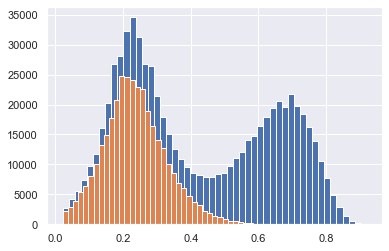

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.018000000000000006
0.01526


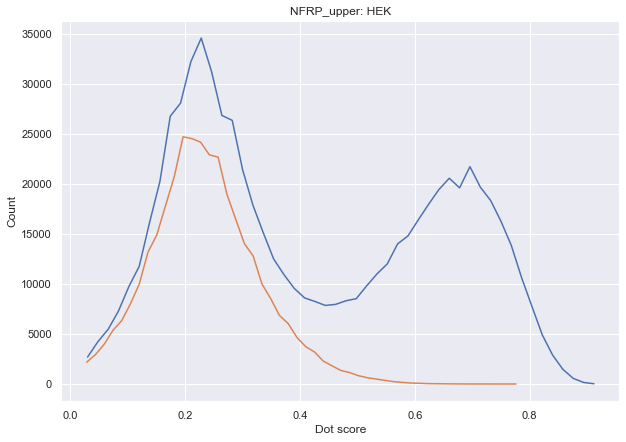

In [8]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('NFRP_upper: HEK')
plt.plot(nnt1[1][:-1] + 0.009, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0075, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

694447
339387


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.4980000000000004
nnt:  277943
nnd:  2773
FDR:  0.009976865760245805
"""

score:  0.001
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.002
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.003
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.004
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.005
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.006
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.007
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.008
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.009000000000000001
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.010000000000000002
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.011000000000000003
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.012000000000000004
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.013000000000000005
nnt:  694447
nnd:  339387
FDR:  0.488715481527028


score:  0.014000000000000005
nnt:  694447
nnd:  339387
FDR:  0.4887

nnt:  669649
nnd:  315626
FDR:  0.4713305029948525


score:  0.10400000000000008
nnt:  669126
nnd:  315099
FDR:  0.4709113081841088


score:  0.10500000000000008
nnt:  668569
nnd:  314567
FDR:  0.4705079056911104


score:  0.10600000000000008
nnt:  668004
nnd:  314017
FDR:  0.4700825144759612


score:  0.10700000000000008
nnt:  667387
nnd:  313496
FDR:  0.4697364497660278


score:  0.10800000000000008
nnt:  666785
nnd:  312930
FDR:  0.46931169717375165


score:  0.10900000000000008
nnt:  666185
nnd:  312352
FDR:  0.4688667562313772


score:  0.11000000000000008
nnt:  665607
nnd:  311771
FDR:  0.4684010234267368


score:  0.11100000000000008
nnt:  664994
nnd:  311184
FDR:  0.46795008676770017


score:  0.11200000000000009
nnt:  664414
nnd:  310572
FDR:  0.46743747121523627


score:  0.11300000000000009
nnt:  663822
nnd:  309991
FDR:  0.4669790998189274


score:  0.11400000000000009
nnt:  663187
nnd:  309367
FDR:  0.46648532012841026


score:  0.11500000000000009
nnt:  662527
nnd:  30874

nnt:  553236
nnd:  207628
FDR:  0.37529734146006405


score:  0.20600000000000016
nnt:  551425
nnd:  206069
FDR:  0.3737026794214988


score:  0.20700000000000016
nnt:  549673
nnd:  204408
FDR:  0.37187200390050085


score:  0.20800000000000016
nnt:  547892
nnd:  202810
FDR:  0.3701641929431348


score:  0.20900000000000016
nnt:  546091
nnd:  201191
FDR:  0.3684202816014181


score:  0.21000000000000016
nnt:  544345
nnd:  199593
FDR:  0.36666636048829326


score:  0.21100000000000016
nnt:  542530
nnd:  197974
FDR:  0.3649088529666562


score:  0.21200000000000016
nnt:  540698
nnd:  196299
FDR:  0.36304739429404215


score:  0.21300000000000016
nnt:  538893
nnd:  194634
FDR:  0.3611737394993069


score:  0.21400000000000016
nnt:  537120
nnd:  192969
FDR:  0.3592660857908847


score:  0.21500000000000016
nnt:  535296
nnd:  191288
FDR:  0.35734995217599236


score:  0.21600000000000016
nnt:  533515
nnd:  189629
FDR:  0.3554333055303037


score:  0.21700000000000016
nnt:  531715
nnd:  1879

nnt:  391558
nnd:  68105
FDR:  0.17393336363961406


score:  0.3080000000000002
nnt:  390455
nnd:  67230
FDR:  0.172183734361194


score:  0.3090000000000002
nnt:  389355
nnd:  66310
FDR:  0.17030730310385125


score:  0.3100000000000002
nnt:  388318
nnd:  65446
FDR:  0.16853712678783883


score:  0.3110000000000002
nnt:  387196
nnd:  64579
FDR:  0.1667863304372979


score:  0.3120000000000002
nnt:  386167
nnd:  63706
FDR:  0.16497007771249225


score:  0.3130000000000002
nnt:  385075
nnd:  62857
FDR:  0.1632331364019996


score:  0.3140000000000002
nnt:  384010
nnd:  61978
FDR:  0.16139683862399418


score:  0.3150000000000002
nnt:  383007
nnd:  61142
FDR:  0.1596367690407747


score:  0.3160000000000002
nnt:  382031
nnd:  60335
FDR:  0.15793220968978958


score:  0.3170000000000002
nnt:  381035
nnd:  59492
FDR:  0.15613263873397457


score:  0.3180000000000002
nnt:  380073
nnd:  58716
FDR:  0.15448611187850755


score:  0.31900000000000023
nnt:  379089
nnd:  57900
FDR:  0.15273458211

nnt:  317461
nnd:  14234
FDR:  0.04483700360044226


score:  0.4120000000000003
nnt:  316999
nnd:  13980
FDR:  0.04410108549238326


score:  0.4130000000000003
nnt:  316528
nnd:  13745
FDR:  0.0434242784208664


score:  0.4140000000000003
nnt:  316037
nnd:  13500
FDR:  0.042716517369801636


score:  0.4150000000000003
nnt:  315593
nnd:  13271
FDR:  0.04205099606138286


score:  0.4160000000000003
nnt:  315155
nnd:  13058
FDR:  0.04143358030175628


score:  0.4170000000000003
nnt:  314736
nnd:  12824
FDR:  0.040745259519089014


score:  0.4180000000000003
nnt:  314286
nnd:  12597
FDR:  0.040081327198793454


score:  0.4190000000000003
nnt:  313794
nnd:  12368
FDR:  0.039414392881954405


score:  0.4200000000000003
nnt:  313332
nnd:  12147
FDR:  0.038767186243345714


score:  0.4210000000000003
nnt:  312865
nnd:  11928
FDR:  0.038125069918335384


score:  0.4220000000000003
nnt:  312422
nnd:  11709
FDR:  0.03747815454737503


score:  0.4230000000000003
nnt:  311968
nnd:  11501
FDR:  0.03

'\n결과\nscore:  0.46700000000000036\nnnt:  292640\nnnd:  2900\nFDR:  0.00990978676872608\n'